<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/fractal_newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El método de Newton-Raphson es un método abierto para resolver ecuaciones no lineales. Resolver se entiende como encontrar los valores de x donde la función f(x) es cero
$$
f(x)=0
$$
El valor particular de x donde la función es cero se conoce como raíz.

El método de Newton-Raphson se deriva de la serie de Taylor, donde se aproxima una función por medio de la serie y esa serie se iguala a cero, para encontrar la aproximación a la raíz se despeja de la serie truncada de primer orden

$$
0=f(x)=f(x_0)+f'(x_0)(x-x_0)+...
$$

Donde $x_0$ es un valor inicial con la que se hace la primer aproximación y $f'(x)$ es la derivada de $f(x)$.
El programa es sencillo:

In [12]:
def nr(f,df,x0,maxit=100,tol=1e-6):
  k=0
  x=x0
  while k<maxit:
    x = x - f(x)/df(x)
    k = k + 1
    if abs(f(x))<tol:
        x_r = x
        return x,k
  return x,k

Donde *maxit* es el número máximo de iteraciones en el ciclo, *k* es el contador de iteraciones, *tol* es el valor máximo que puede tener la función para aceptarse como la raíz de $f(x)$. Ambos valores son arbitrarios y se dan de acuerdo al problema que se quiere resolver.

Por ejemplo, si se quiere saber la raíz de la siguiente función

$$
f(x)=x^2-2
$$

obtenemos su derivada que es

$$
f'(x)=2x
$$

Podemos dar un valor inicial por ejemplo $x_0=1$, un valor máximo de iteraciones $= 100$ y una tolerancia $= 1e-5$. 

Ejecutamos el programa de Newton-Raphson para encontrar la raíz

In [14]:
f  = lambda x: x**2-2
df = lambda x: 2*x
x0       = 1
niter    = 100
tol      = 1e-5

raiz,k=nr(f,df,x0,niter,tol)
print(raiz,k)

1.4142156862745099 3


El resultado es raiz$=1.4142$ en $3$ iteraciones. Si cambiamos el valor inicial por ejemplo $x_0=0.5$ obtenemos

In [4]:
x0       = 0.5

raiz,k=nr(f,df,x0,niter,tol)
print(raiz,k)

1.4142135625249321 5


Observamos que llegamos al mismo resultado de la raíz pero con $5$ iteraciones, ahora probemos con otro valor de $x_0=0.1$

In [5]:
x0       = 0.1

raiz,k=nr(f,df,x0,niter,tol)
print(raiz,k)

1.4142136001158032 7


Sigue obteniendo el resultado pero ahora en $7$ iteraciones, hagamos otra prueba, ahora con $x_0=0.001$

In [6]:
x0       = 0.001

raiz,k=nr(f,df,x0,niter,tol)
print(raiz,k)

1.4142135626178514 14


Observamos que igualmente llega al resultado pero ahora le toma $14$ iteraciones, notamos que si el valor inicial se acerca a 0 entonces le toma más iteraciones llegar a la raíz, no es posible que $x_0=0$ porque la derivada es cero y el valor de x se indetermina y no es posible obtener la raíz.

In [13]:
x0       = 1e-15

raiz,k=nr(f,df,x0,niter,tol)
print(raiz,k)

1.4142135623974939 54


Podemos pensar que existen valores de $x_0$ donde es más fácil encontrar la raíz y existen otros donde encontrar la raíz es un poco más tardado.

Seamos un poco curiosos y aberigüemos qué comportamiento tiene el método de Newton-Raphson para otros valores iniciales. Si hacemos un proceso donde cambiemos el valor inicial de $x_0$ en el intervalo $[-2, 2]$ y obtenemos el número de iteraciones $k$ que le toma llegar a la raíz en cada caso y grafiquemos esos resultados para observar el comportamiento

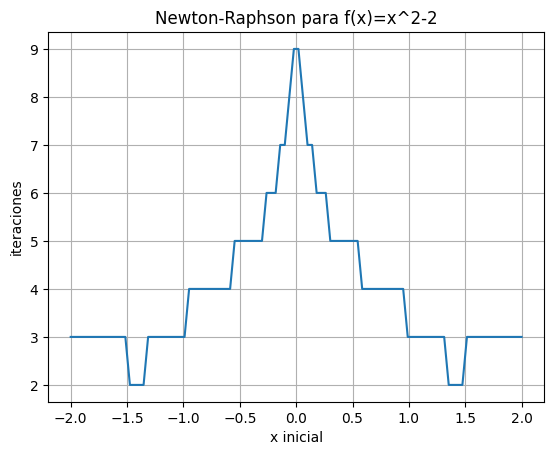

In [20]:
import numpy as np
import matplotlib.pyplot as plt

n=100
rangox=[-2, 2]
xs=np.linspace(rangox[0],rangox[1],n)
ks=np.zeros(n)
for j in range(n):
    x0=xs[j]
    xr,ks[j]=nr(f,df,x0,niter,tol)

plt.plot(xs,ks)
plt.title('Newton-Raphson para f(x)=x^2-2')
plt.xlabel('x inicial')
plt.ylabel('iteraciones')
plt.grid()


Observamos dos mínimos cercanos a $-1.4142$ y $1.4142$, esto nos indica que se requieren menos iteraciones en valores cercanos a estos puntos.
Será el mismo comportamiento para otras funciones?
Cambiemos ahora la función como

$$
f(x)=x^3-1
$$
$$
f(x)=3x^2
$$

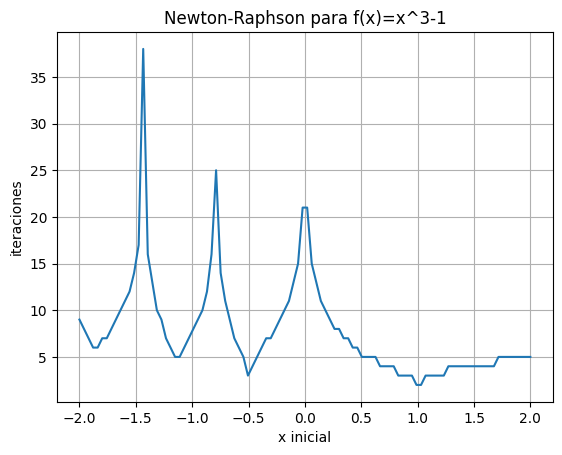

In [35]:
f  = lambda x: x**3-1
df = lambda x: 3*x**2

n=100
rangox=[-2, 2]
xs=np.linspace(rangox[0],rangox[1],n)
ks=np.zeros(n)
for j in range(n):
    x0=xs[j]
    xr,ks[j]=nr(f,df,x0,niter,tol)

plt.plot(xs,ks)
plt.title('Newton-Raphson para f(x)=x^3-1')
plt.xlabel('x inicial')
plt.ylabel('iteraciones')
plt.grid()

A diferencia de la función cuadrática anterior, ésta función cúbica tiene 3 raíces, una es real y las otras dos son complejas. El método de Newton-Raphson es capaz de encontrar raíces complejas, solo que el valor inicial $x_0$ debe ser un valor complejo. Entonces debemos crear un valor complejo para los valores iniciales, y debemos variar tanto el valor real como el imaginario de cada valor complejo y hacer todas las combinaciones

In [22]:
xs=np.linspace(rangox[0],rangox[1],n) #valores reales
ys=np.linspace(rangox[0],rangox[1],n) #valores imaginarios
[x, y] = np.meshgrid(xs, ys) #combinaciones de cada valor

Para poder graficar tanto el valor real como el imaginario y además el número de iteraciones que requiere el método para encontrar la raíz tendremos que usar una gráfica en tres dimensiones donde el plano x-y es el valor complejo y el eje z son las iteraciones.

(60, 60)


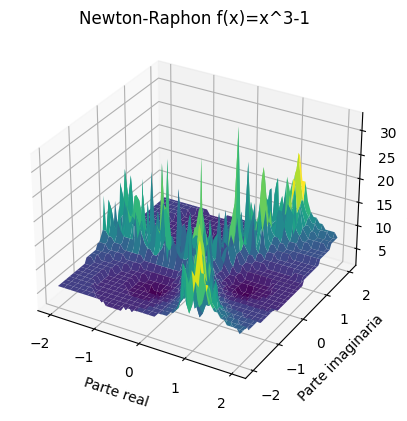

In [36]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

n=60
lienzo = np.zeros((n,n))
rangox=[-2, 2]
rangoy=[-2, 2]
xs=np.linspace(rangox[0],rangox[1],n) #valores reales
ys=np.linspace(rangoy[0],rangoy[1],n) #valores imaginarios
[x, y] = np.meshgrid(xs, ys) #combinaciones de cada valor
print(y.shape)
ks=np.zeros(n)
for i in range(n):
  for j in range(n):
    #print(x[i,i],y[i,i])
    x0=complex(x[i,j],y[i,j]) #se crea el valor complejo
    #print(x0)
    [xr,ks]=nr(f,df,x0)
    lienzo[i,j]=ks

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, lienzo,cmap='viridis', edgecolor='none')
ax.set_title('Newton-Raphon f(x)=x^3-1')
ax.set_xlabel('Parte real')
ax.set_ylabel('Parte imaginaria')
ax.set_zlabel('Iteraciones')
plt.show()

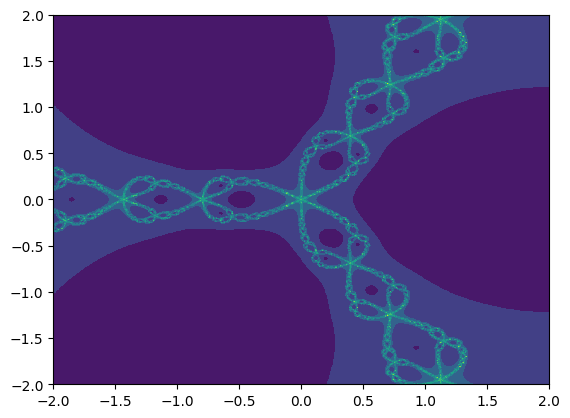

In [38]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

n=900
lienzo = np.zeros((n,n))
rangox=[-2, 2]
rangoy=[-2, 2]
xs=np.linspace(rangox[0],rangox[1],n) #valores reales
ys=np.linspace(rangoy[0],rangoy[1],n) #valores imaginarios
[x, y] = np.meshgrid(xs, ys) #combinaciones de cada valor

ks=np.zeros(n)
for i in range(n):
  for j in range(n):
    x0=complex(x[i,j],y[i,j]) #se crea el valor complejo
    [xr,ks]=nr(f,df,x0)
    lienzo[i,j]=ks

fig,ax=plt.subplots(1,1)
cp = ax.contourf(x, y, lienzo)

plt.show()

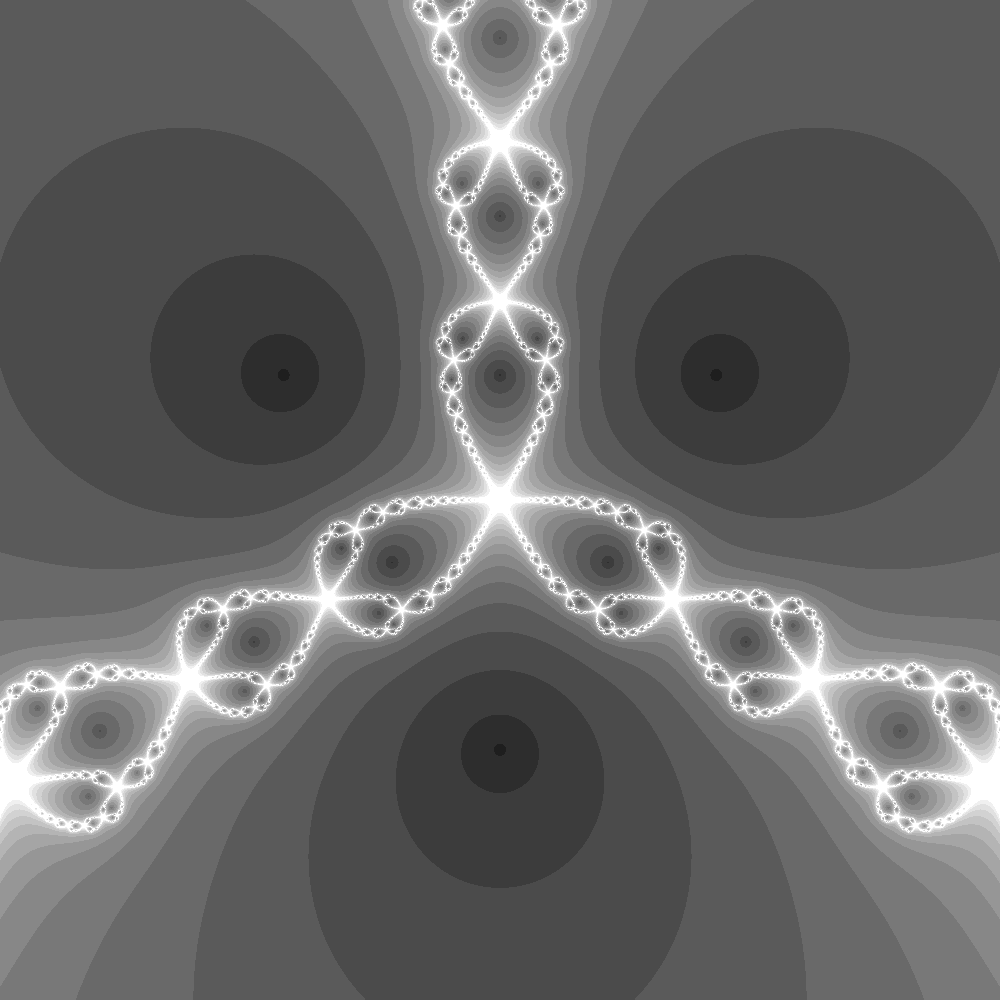

In [54]:
import numpy as np
import cmath

n=1000
lienzo = np.zeros((n,n))
rangox=[-2, 2]
rangoy=[-2, 2]
xs=np.linspace(rangox[0],rangox[1],n) #valores reales
ys=np.linspace(rangoy[0],rangoy[1],n) #valores imaginarios
[x, y] = np.meshgrid(xs, ys) #combinaciones de cada valor

from PIL import Image
image = Image.new(mode='L', size=(n, n))

for i in range(n):
  for j in range(n):
    x0=complex(x[i,j],y[i,j]) #se crea el valor complejo
    [xr,ks]=nr(f,df,x0)
    image.putpixel((i, j), ks*15)

image.show()

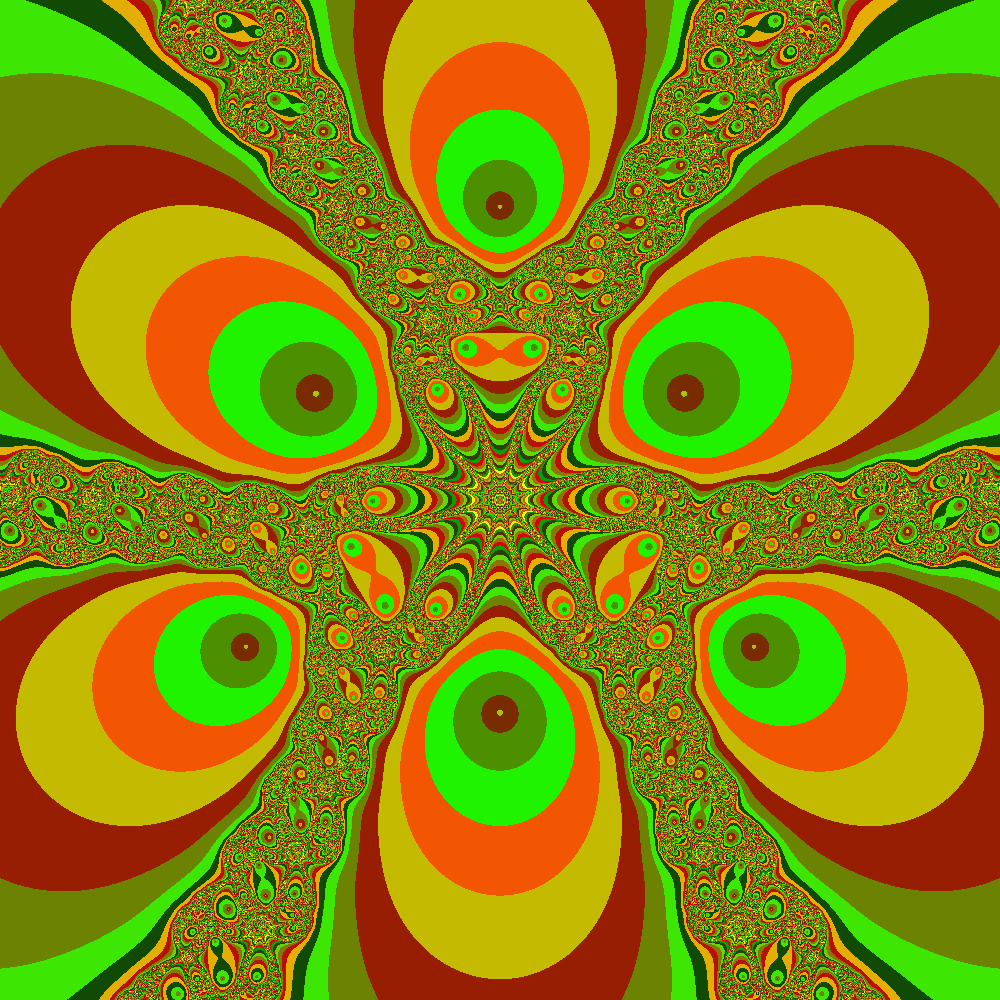

In [55]:
import numpy as np
import cmath

n=1000
lienzo = np.zeros((n,n))
rangox=[-2, 2]
rangoy=[-2, 2]
xs=np.linspace(rangox[0],rangox[1],n) #valores reales
ys=np.linspace(rangoy[0],rangoy[1],n) #valores imaginarios
[x, y] = np.meshgrid(xs, ys) #combinaciones de cada valor

from PIL import Image
image = Image.new(mode='RGB', size=(n, n))

f = lambda x:x**6+x**3-1
df = lambda x:6*x**5+3*x**2

for i in range(n):
  for j in range(n):
    x0=complex(x[i,j],y[i,j]) #se crea el valor complejo
    [xr,ks]=nr(f,df,x0)
    image.putpixel((i, j), ks*25555)

image.show()